import pickle
import pandas as pd
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Imports

## Libraries

In [45]:
import shapefile
import geopandas
import unidecode

## Data

In [2]:
pct_df = pd.read_csv("./my_saved_data/final_nyc_chi_dal_sf_df.csv", index_col=0)

<IPython.core.display.Javascript object>

In [3]:
pct_df.head(2)

,index,NYC,Chi,Dal,SF
0,Aguascalientes,0.01,0.0,0.00,0.00
1,Baja California,0.07,0.0,0.02,0.04


In [4]:
with open("./my_saved_data/restaurant_counts.pickle", "rb+") as f:
    rest_counts = pickle.load(f)

<IPython.core.display.Javascript object>

In [5]:
rest_counts

{'NYC': 20, 'Chi': 5, 'Dal': 27, 'SF': 14}

In [6]:
all_df = pd.read_csv("./my_saved_data/Final_restaurant_list.csv", index_col=0)

<IPython.core.display.Javascript object>

In [7]:
all_df.head(2)

,City,Match,Region
chilango,Chicago,chilango,Ciudad de Mexico
los alamos,Chicago,alamos,Tabasco


# EDA

In [8]:
pct_df.sort_values(by=['NYC'], ascending=False)[0:5]

,index,NYC,Chi,Dal,SF
20,Puebla,0.37,0.0,0.01,0.00
29,Yucatan,0.13,0.0,0.04,0.11
5,Chihuahua,0.07,0.0,0.01,0.07
1,Baja California,0.07,0.0,0.02,0.04
19,Oaxaca,0.05,0.0,0.01,0.02


In [9]:
pct_df.sort_values(by=['Chi'], ascending=False)[0:5]

,index,NYC,Chi,Dal,SF
12,Jalisco,0.02,0.29,0.04,0.02
15,Michoacan de Ocampo,0.00,0.14,0.21,0.00
6,Ciudad de Mexico,0.00,0.14,0.01,0.00
25,Tabasco,0.01,0.14,0.04,0.04
10,Guerrero,0.02,0.14,0.07,0.04


In [10]:
pct_df.sort_values(by=['Dal'], ascending=False)[0:5]

,index,NYC,Chi,Dal,SF
15,Michoacan de Ocampo,0.00,0.14,0.21,0.00
3,Campeche,0.00,0.00,0.10,0.04
28,Veracruz,0.03,0.00,0.09,0.04
10,Guerrero,0.02,0.14,0.07,0.04
11,Hidalgo,0.02,0.00,0.06,0.00


In [11]:
pct_df.sort_values(by=['SF'], ascending=False)[0:5]

,index,NYC,Chi,Dal,SF
9,Guanajuato,0.00,0.0,0.01,0.40
29,Yucatan,0.13,0.0,0.04,0.11
5,Chihuahua,0.07,0.0,0.01,0.07
13,Mexico,0.01,0.0,0.05,0.07
3,Campeche,0.00,0.0,0.10,0.04


## How much overlap is there in the major regions for each group?

In [12]:
nyc_top5 = list(pct_df.sort_values(by=['NYC'], ascending=False)[0:5]['index'])

In [13]:
chi_top5 = list(pct_df.sort_values(by=['Chi'], ascending=False)[0:5]['index'])

In [14]:
dal_top5 = list(pct_df.sort_values(by=['Dal'], ascending=False)[0:5]['index'])

In [15]:
sf_top5 =list(pct_df.sort_values(by=['SF'], ascending=False)[0:5]['index'])

In [16]:
print(nyc_top5)
print(chi_top5)
print(dal_top5)
print(sf_top5)

['Puebla', 'Yucatan', 'Chihuahua', 'Baja California', 'Oaxaca']
['Jalisco', 'Michoacan de Ocampo', 'Ciudad de Mexico', 'Tabasco', 'Guerrero']
['Michoacan de Ocampo', 'Campeche', 'Veracruz', 'Guerrero', 'Hidalgo']
['Guanajuato', 'Yucatan', 'Chihuahua', 'Mexico', 'Campeche']


In [17]:
top5_region_dict = {y:0 for x in [nyc_top5, chi_top5, dal_top5, sf_top5] for y in x}

In [18]:
for sublist in [nyc_top5, chi_top5, dal_top5, sf_top5]:
    for region in sublist:
        for key, value in top5_region_dict.items():
            if region == key:
                top5_region_dict[key] += 1

In [19]:
top5_region_dict

{'Puebla': 1,
 'Yucatan': 2,
 'Chihuahua': 2,
 'Baja California': 1,
 'Oaxaca': 1,
 'Jalisco': 1,
 'Michoacan de Ocampo': 2,
 'Ciudad de Mexico': 1,
 'Tabasco': 1,
 'Guerrero': 2,
 'Campeche': 2,
 'Veracruz': 1,
 'Hidalgo': 1,
 'Guanajuato': 1,
 'Mexico': 1}

In [20]:
# only showing the most common regions
top5_more_than_2_list = []
for key, value in top5_region_dict.items():
    if value >= 2:
        top5_more_than_2_list.append(key)

In [21]:
top5_more_than_2_list

['Yucatan', 'Chihuahua', 'Michoacan de Ocampo', 'Guerrero', 'Campeche']

# Displaying Data

## Shapefile for mexico regions
https://geodata.lib.berkeley.edu/catalog/stanford-fs602xc1533

In [22]:
sf = shapefile.Reader("./data/MEX_adm1.shp")

In [23]:
states = [x[4] for x in sf.records()]

In [24]:
states[0:2]

['Aguascalientes', 'Baja California Sur']

In [25]:
state_shape_zip = dict(zip(states, sf.shapes()))

In [26]:
list(state_shape_zip.items())[0:2]

[('Aguascalientes', <shapefile.Shape at 0x11fcc1278>),
 ('Baja California Sur', <shapefile.Shape at 0x11fcc1518>)]

In [27]:
state_shape_df = pd.DataFrame.from_dict(state_shape_zip, orient='index')

<IPython.core.display.Javascript object>

In [28]:
state_shape_df.columns = ['geometry']

## Geodataframe

In [29]:
mex_gdf = geopandas.read_file("./data/MEX_adm1.shp")

In [30]:
mex_gdf.plot()

### Removing Unnecessary columns

In [31]:
mex_gdf.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'HASC_1', 'CCN_1', 'CCA_1',
       'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')

In [32]:
mex_gdf.drop(columns = ['ID_0', 'ID_1', 'ISO', 'NAME_0', 'HASC_1', 'CCN_1', 'CCA_1',
       'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'], inplace=True)

In [50]:
regions = [unidecode.unidecode(x) for x in mex_gdf['NAME_1']]

In [51]:
mex_gdf['Region'] = regions

### Adding pct_df data

In [34]:
# which regions are missing in pct_df 

In [40]:
pct_df_names = list(pct_df['index'])

In [47]:
len(pct_df_names)

29

In [57]:
# pct_df_names

In [52]:
# truly missing regions are: queretaro, coahuila, quintana roo
for x in regions:
    if x not in pct_df_names:
        print(x)

Coahuila
Distrito Federal
Michoacan
Queretaro
Quintana Roo


#### Renaming 2 regions in pct_df

In [56]:
pct_df['index'][6] = 'Distrito Federal'
pct_df['index'][15] = 'Michoacan'

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Joining the two 

In [60]:
mex_gdf2 = mex_gdf.merge(pct_df, left_on = 'Region', right_on = 'index', how='outer')

In [62]:
mex_gdf2.fillna(value = 0, inplace=True)

In [63]:
mex_gdf2.head(2)

,NAME_1,geometry,Region,index,NYC,Chi,Dal,SF
0,Aguascalientes,"POLYGON ((-102.12611 21.73960, -102.13392 21.7...",Aguascalientes,Aguascalientes,0.01,0.0,0.00,0.0
1,Baja California Sur,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568...",Baja California Sur,Baja California Sur,0.01,0.0,0.02,0.0


## Choropleth maps

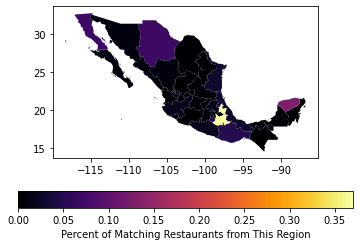

In [83]:
# NYC 
mex_gdf2.plot(column='NYC', legend=True, cmap='inferno',
             legend_kwds={'label': "Percent of Matching Restaurants from This Region", 
                          'orientation': "horizontal"})

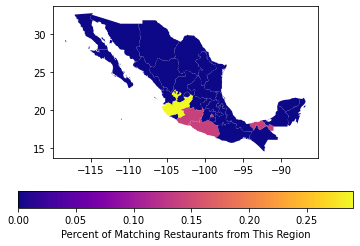

In [84]:
# chicago
mex_gdf2.plot(column='Chi', legend=True, cmap = 'plasma',
             legend_kwds={'label': "Percent of Matching Restaurants from This Region", 
                          'orientation': "horizontal"})

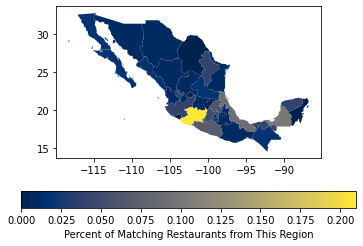

In [86]:
# dal
mex_gdf2.plot(column='Dal', legend=True, cmap = 'cividis',
             legend_kwds={'label': "Percent of Matching Restaurants from This Region", 
                          'orientation': "horizontal"})

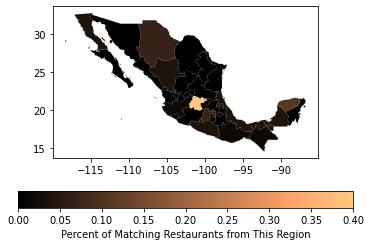

In [89]:
# sf
mex_gdf2.plot(column='SF', legend=True, cmap = 'copper',
             legend_kwds={'label': "Percent of Matching Restaurants from This Region", 
                          'orientation': "horizontal"})

## Percent of Restaurants that Have a Region Associated With Them

In [94]:
#NYC had 849 unique mexican restaurants, 20 matched
print(f"The percent of restaurants that had a name attached to a region was {round(20/849, 2)}%")

The percent of restaurants that had a name attached to a region was 0.02%


/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

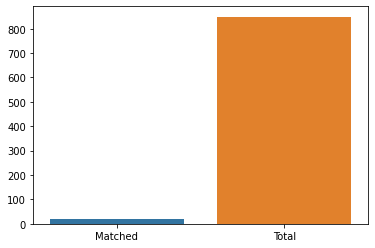

In [95]:
sns.barplot(x=['Matched', 'Total'], y=[20, 849])

## Count of matching Restaurants Across Cities

In [97]:
cities = [key for key in rest_counts.keys()]

In [98]:
num_of_restaurants = [value for value in rest_counts.values()]

In [96]:
sns.barplot(data=rest_counts)

<IPython.core.display.Javascript object>

KeyError: 0

# Statistical Analyses
is the proportion of people from Puebla in NYC larger than that in the other cities measured here? 

# Conclusions

All 4 cities have large Mexican immigrant populations (250k and above according to: https://247wallst.com/economy/2017/01/27/us-cities-with-the-most-mexican-immigrants/). Despite this surface similarity, it turns out that these immigrants do not all come from similar regions in Mexico. No region was in the top 5 most popular region for more than 2 of these cities. This suggests that immigration from Mexico was not dominated by one region but came from all regions of Mexico. Similarly, we see that there are no single region that makes up the majority of any US city's Mexican population: in all cases, no region accounted for more than 36% of the restaurants with regions associated with their names. This did have some variation, however: in San Francisco Guanajuato accounts for 40% of the restaurants while in Dallas the most dominant group accounts for 21%.

Some shortcomings of this project are the quality of this data: both for the demonym dictionary and the inspection data. The demonym dictionary had many entries, but there were some clear errors, e.g.: the restaurant 'jalisco' in Dallas was associated with "Ciudad de Mexico" instead of the region Jalisco. Additionally, it is not clear if **all** restaurants in each city are included in this data, or only restaurants that failed the inspection. In a similar vein, some cities had data that had too low of a quality to be useful (LA). Another problem with this project is deciding when a "match" is legitimate. For example, "Pueblito" ("little town") appeared often and is a town in Queretáro, but do these restaurants refer to the former or the latter? This was decided on an ad hoc basis and was founded solely on my (non-native) discretion. Lastly, the obvious issue of immediate representation being a marker of the true number of people from a certain region is certainly flawed. Just because there are say, a lot of Italian restaurants in a certain area, does not necessarily mean that there are many italian (recent) immigrants to that area. The popularity of food from certain regions may skew the data. 

Anecdotally, it appears that chain migration happens at a micro level. "Tulcingo" appears 5 times in the NYC data despite the fact that the town that it refers to in Mexico, Tulcingo del Valle, has only 9,000 people living in it (source: https://es.wikipedia.org/wiki/Municipio_de_Tulcingo)! 